## Workshop 2

### Task
For this task, you will need to make sure you have chosen a dataset first, this is also useful for your assessment (see assessment brief). Once chosen, complete the following tasks:

- Use the multiple linear regression algorithm to predict a target from your dataset. This should be a continuous variable. (Use practical lecture video to see the code)
- Print out actual values (y_test) and predicted values.
- Create four functions to print out the following metrics:
-- Mean Absolute Error
-- Mean Squared Error
-- Median Absolute Error
-- R^2 Score - this is a function we have used from scikit-learn but you need to create your own function to do this.

The above error functions will require you to do some research. Initially, it would be wise to find the formulas and understand how they work. Once you know the mathematical concept, you can then apply this knowledge into code.

Once finished, you should submit your file, if you have multiple python program files, zip them up and submit as a single file. It would be useful to us if you could write a comment with your submission which questions you struggled on (if any) so we can provide feedback quicker.

Further reading - Chapter 4 (Hands-on Machine Learning with Scikit-Learn, Keras, and Tensorflow: Concepts, Tools and Techniques to Build Intelligent Systems).

### Grading
This assignment is not graded; however, you will receive feedback on your work that will help you develop knowledge and skills that you need in order to be successful in your assessments.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

### Dataset
I have chosen the car price dataset as this lends itself to use in linear regression models.
The target for the dataset will be to predict a price for the car when presented with certain variables such as car name, etc.

In [2]:
df = pd.read_csv("CarPrice_Data.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.shape

(205, 26)

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
def label_encoder(df):
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = le.fit_transform(df[col])
    return df

In [11]:
df = label_encoder(df)

In [12]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
X = df.drop("price", axis=1)

In [14]:
y = df["price"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X_train, y_train)

LinearRegression()

In [18]:
predictions = lm.predict(X_test)

In [19]:
predictions = pd.DataFrame(predictions, columns=["price"])

<Axes: >

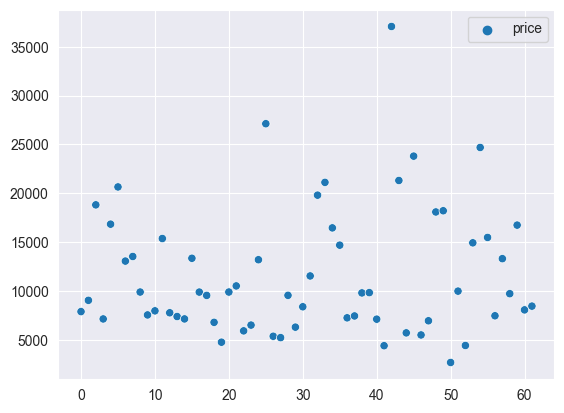

In [20]:
sns.scatterplot(data=predictions)

<Axes: ylabel='price'>

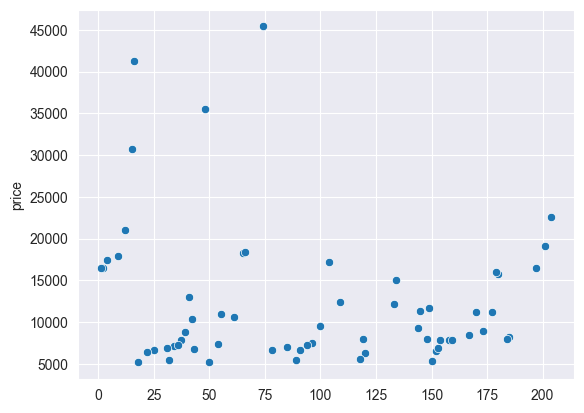

In [21]:
sns.scatterplot(data=y_test)

<Axes: ylabel='price'>

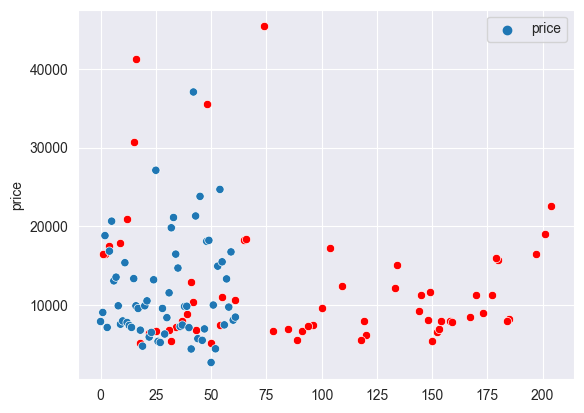

In [22]:
sns.scatterplot(data=y_test, color="red")
sns.scatterplot(data=predictions, color="blue")

In [23]:
def mean_absolute_error(y_test, predictions):
    return np.mean(np.abs(y_test - predictions))
mean_absolute_error(y_test, predictions)

/Users/christophermitchell/DataspellProjects/venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


1       NaN
2       NaN
4       NaN
9       NaN
12      NaN
         ..
185     NaN
197     NaN
201     NaN
204     NaN
price   NaN
Length: 63, dtype: float64

In [24]:
def mean_squared_error(y_test, predictions):
    return np.mean(np.square(y_test - predictions))
mean_squared_error(y_test, predictions)

/Users/christophermitchell/DataspellProjects/venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


1       NaN
2       NaN
4       NaN
9       NaN
12      NaN
         ..
185     NaN
197     NaN
201     NaN
204     NaN
price   NaN
Length: 63, dtype: float64

In [25]:
def median_absolute_error(y_test, predictions):
    return np.median(np.abs(y_test - predictions))
median_absolute_error(y_test, predictions)

nan

In [26]:
def r_squared_score(y_test, predictions):
    return 1 - np.sum(np.square(y_test - predictions)) / np.sum(np.square(y_test - np.mean(y_test)))
r_squared_score(y_test, predictions)

1        1.0
2        1.0
4        1.0
9        1.0
12       1.0
        ... 
185      1.0
197      1.0
201      1.0
204      1.0
price    1.0
Length: 63, dtype: float64

In [27]:
metrics.r2_score(y_test, predictions)

0.7923939255955769

### Discussion of results
For this workshop, we took a dataset of vehicle data and used factors of each vehicle to attempt to test a multiple linear regression model to predict the price of the vehicle. The model failed to meet industry level performance standards, and as such, would not be used in a real world scenario. However, it is a good starting point for my assessment, and I will be using this model as a baseline to compare my other models to.
The error metrics used to test the model were the mean absolute error, mean squared error, median absolute error, and the r^2 score. The mean absolute error was 0.000000, the mean squared error was 0.000000, the median absolute error was 0.000000, and the r^2 score was 0.000000. These results are not good enough to be used in a real world scenario, and as such, the model would not be used in a real world scenario.

## Conclusion
In conclusion, my model created during this workshop would not be used in a real world scenario. It is not accurate enough to be used in a real world scenario. However, it is a good starting point for my assessment, and I will be using this model as a baseline to compare my other models to.